In [1]:
import pandas as pd
import os 
import numpy as np

import sys
from src.models.models import ViTVAE_PatchGAN
from main import main
main(model_type = "ViTVAE_PatchGAN", batch_size = 1, max_epochs =1)

wandb: Currently logged in as: ml_dtu (use `wandb login --relogin` to force relogin)


Global seed set to 1234


RuntimeError: No GPUs available.

In [2]:
model = ViTVAE_PatchGAN()

In [3]:
import torch
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.callbacks import (
    EarlyStopping,
    LearningRateMonitor,
    ModelCheckpoint,
)
from src.data.make_dataset import CelebADataModule, CIFARDataModule

In [4]:
trainer = Trainer(
        max_epochs=1,
        gpus=-1,
        precision=16,
        deterministic=False,
        auto_lr_find=False,
        auto_scale_batch_size=False,
        auto_select_gpus=True,
        log_every_n_steps=25,
        
)

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
celeb = CelebADataModule(batch_size=2, num_workers=0)
celeb.setup()

In [6]:
trainer.validate(model,datamodule = celeb)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

TypeError: discriminator_loss() takes 2 positional arguments but 3 were given

In [36]:
import sys
sys.path[0] = "\\".join(sys.path[0].split("\\")[:-1])
import torch

In [2]:
pip install pandas

  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
You should consider upgrading via the '/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.listdir("../../")

['.ipynb_checkpoints',
 '2010.11929.pdf',
 '2104.03602.pdf',
 'assignment0.docx',
 'assignment1.docx',
 'Attention is all you need.pdf',
 'CIARP-2018_Data-Augmentation-VAEs.pdf',
 'Generative_Transformer.pdf',
 'list_attr_celeba.csv',
 'list_attr_celeba.csv.zip',
 'models.py',
 'on_position_embeddings_in_bert.pdf',
 'Projects.docx',
 'Untitled.ipynb',
 'Vision-transformers-for-generative-modeling']

In [4]:
df = pd.read_csv("../../list_attr_celeba.csv")

In [16]:
import numpy as np
_, counts = np.unique(df["Arched_Eyebrows"], return_counts=True)
counts[1]

54090

In [17]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [34]:
df[(df["Eyeglasses"]==1) & (df["Male"]==-1)].shape

(2715, 41)

In [ ]:
df[]

In [22]:
for col in df.columns:
    _, counts = np.unique(df[col], return_counts=True)
    print(col, counts[1])

image_id 1
5_o_Clock_Shadow 22516
Arched_Eyebrows 54090
Attractive 103833
Bags_Under_Eyes 41446
Bald 4547
Bangs 30709
Big_Lips 48785
Big_Nose 47516
Black_Hair 48472
Blond_Hair 29983
Blurry 10312
Brown_Hair 41572
Bushy_Eyebrows 28803
Chubby 11663
Double_Chin 9459
Eyeglasses 13193
Goatee 12716
Gray_Hair 8499
Heavy_Makeup 78390
High_Cheekbones 92189
Male 84434
Mouth_Slightly_Open 97942
Mustache 8417
Narrow_Eyes 23329
No_Beard 169158
Oval_Face 57567
Pale_Skin 8701
Pointy_Nose 56210
Receding_Hairline 16163
Rosy_Cheeks 13315
Sideburns 11449
Smiling 97669
Straight_Hair 42222
Wavy_Hair 64744
Wearing_Earrings 38276
Wearing_Hat 9818
Wearing_Lipstick 95715
Wearing_Necklace 24913
Wearing_Necktie 14732
Young 156734


In [335]:
model = ViTVAE(image_size=(96,80), dim=1024, mlp_dim=1024, heads=8)
model.load_state_dict(torch.load("../models/ViTVAE/ViTVAE_16_1024_4_8_1024.ckpt")["state_dict"])

<All keys matched successfully>

In [2]:
import pandas as pd
import os 
import numpy as np
import sys
from src.models.models import ViTVAE_PatchGAN
from main import main
main(model_type = "ViTVAE_PatchGAN", batch_size = 1)

/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/lib/python3.9/site-packages/pytorch_lightning/loggers/wandb.py:345: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
Global seed set to 1234
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type                | Params
------------------------------------------------------------
0 | to_patch_embedding  | Sequential          | 196 K 
1 | back_to_img         | Sequential          | 12.6 M
2 | dropout             | Dropout             | 0     
3 | encoder_transformer | Transformer         | 2.6 M 
4 | decoder_transformer | Transformer         

Sanity Checking: 0it [00:00, ?it/s]

tensor([[[[0.1647, 0.1725, 0.1725,  ..., 0.2078, 0.2039, 0.2078],
          [0.1647, 0.1725, 0.1725,  ..., 0.2078, 0.2039, 0.2078],
          [0.1647, 0.1725, 0.1725,  ..., 0.2078, 0.2039, 0.2078],
          ...,
          [0.1020, 0.1020, 0.1020,  ..., 0.1020, 0.0980, 0.0941],
          [0.1020, 0.1020, 0.1020,  ..., 0.1020, 0.0980, 0.0941],
          [0.1020, 0.1020, 0.1020,  ..., 0.0980, 0.0941, 0.0941]],

         [[0.1569, 0.1647, 0.1647,  ..., 0.2000, 0.1961, 0.2000],
          [0.1569, 0.1647, 0.1647,  ..., 0.2000, 0.1961, 0.2000],
          [0.1569, 0.1647, 0.1647,  ..., 0.2000, 0.1961, 0.2000],
          ...,
          [0.0980, 0.0980, 0.0980,  ..., 0.0902, 0.0902, 0.0902],
          [0.0980, 0.0980, 0.0980,  ..., 0.0902, 0.0902, 0.0902],
          [0.0980, 0.0980, 0.0980,  ..., 0.0863, 0.0863, 0.0902]],

         [[0.2000, 0.2078, 0.2078,  ..., 0.2431, 0.2392, 0.2431],
          [0.2000, 0.2078, 0.2078,  ..., 0.2431, 0.2392, 0.2431],
          [0.2000, 0.2078, 0.2078,  ..., 0

TypeError: discriminator_loss() takes 2 positional arguments but 3 were given

In [ ]:
import torchvision
def read_image(img_path):
    image = torchvision.io.read_image(img_path)
    image = torchvision.transforms.functional.resize(image, (96, 80))
    #image = torchvision.transforms.functional.to_tensor(image)
    return image/255.

In [337]:
img_w_b_m = read_image("white_brunette_man.jpg")
img_w_b_w = read_image("white_brunette_woman.jpg")

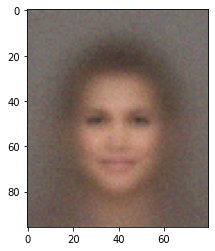

In [363]:
_, recon_image, _, _ = model.forward(img_w_b_w[None, :])
plt.imshow(recon_image[0].permute(1,2,0).detach().numpy())

In [339]:
def encode_image(img): 
    img = img[None, :]
    x = model.encoder(img)
    x += model.decoder_pos_embedding
    mean = x[:, 0]
    log_var = x[:, 1]
    z = model.reparameterize(mean, log_var)
    return z

In [340]:
img_w_b_m_enc = encode_image(img_w_b_m)
img_w_b_w_enc = encode_image(img_w_b_w)

In [341]:
img_w_b_w_enc.shape

torch.Size([1, 1, 1024])

In [342]:
img_w_b_m_enc[0,0,1].item()

0.7917076349258423

In [343]:
img_w_b_m_enc.shape[-1]

1024

In [344]:
def get_interpolated_encodings(enc_1, enc_2, n_steps):
    dimensional_interpolations = np.array([np.linspace(enc_1[0,0,i].item(), enc_2[0,0,i].item(), n_steps) for i in range(enc_1.shape[-1])])
    
    list_interpolated_encodings = []
    for i in range(n_steps):
        list_interpolated_encodings.append(torch.tensor(dimensional_interpolations[:, i].reshape(1,1,enc_1.shape[-1])).float())
    return list_interpolated_encodings

In [345]:
list_interpolated_encodings = get_interpolated_encodings(img_w_b_m_enc, img_w_b_w_enc, 10)

In [346]:
import matplotlib.pyplot as plt

In [324]:
z = torch.rand((1,1,512))

In [325]:
z = torch.rand((1,1,512))

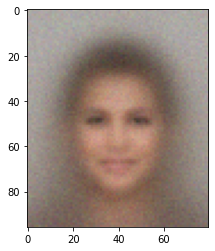

In [353]:
z = torch.randn(1, 1, 1024)
img = model.decoder(z)
plt.imshow(img[0].permute(1,2,0).detach().numpy())

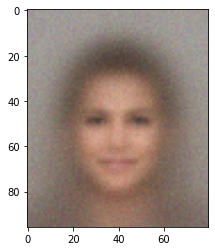

In [355]:
z = torch.randn(1, 1, 512)
img = model.decoder(list_interpolated_encodings[0])
plt.imshow(img[0].permute(1,2,0).detach().numpy())

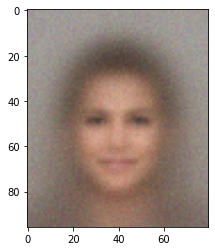

In [356]:
img = model.decoder(img_w_b_m_enc)
plt.imshow(img[0].permute(1,2,0).detach().numpy())

In [4]:
from main import main

In [ ]:
main()

wandb: Currently logged in as: smcournane (use `wandb login --relogin` to force relogin)


Global seed set to 1234
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type        | Params
----------------------------------------------------
0 | to_patch_embedding  | Sequential  | 196 K 
1 | back_to_img         | Sequential  | 12.6 M
2 | dropout             | Dropout     | 0     
3 | encoder_transformer | Transformer | 14.2 M
4 | decoder_transformer | Transformer | 14.2 M
5 | decoder_conv        | Sequential  | 15.3 M
----------------------------------------------------
56.6 M    Trainable params
0         Non-trainable params
56.6 M    Total params
113.121   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/zhome/3e/2/160166/Vision-transformers-for-generative-modeling/aml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of 

Training: 0it [00:00, ?it/s]

In [4]:
from src.data.make_dataset import CelebADataModule

In [5]:
celeb = CelebADataModule()
celeb.prepare_data()
celeb.setup()

In [27]:
celeb.data_dir

'C:\\Users\\alroa\\Desktop\\DTU\\Second Semester\\Machine Learning\\Vision-transformers-for-generative-modeling\\data'

In [6]:
celeb_train_dl = celeb.train_dataloader()

In [7]:
for x, y in celeb_train_dl:
    break

In [8]:
x.shape

torch.Size([64, 3, 218, 178])

In [9]:
y.shape

torch.Size([64, 40])

In [10]:
y

tensor([[0, 1, 1,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 1,  ..., 1, 0, 1],
        [0, 1, 1,  ..., 0, 0, 1],
        [1, 0, 1,  ..., 0, 0, 1]])